In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

In [12]:
#Reading the file and splitting our target column
df = pd.read_csv (r'bank-additional-full.csv', sep = ';', engine= 'python')   

tussen = df[["y"]]
target = tussen.copy()
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)

df=df[['age','default', 'contact', 'month', 'previous', 'poutcome', 'emp.var.rate', 'euribor3m', 'nr.employed']]

#Encoding all the catergorical variables and deleting them from the old dataframe
categories = ['contact','month','poutcome']
df_encoded = pd.get_dummies(df['default'], prefix='default', drop_first=True)
df_encoded.insert(0, 'ID', range(0, len(df_encoded)))
del df['default']

for x in categories:
    df_encoded_tussen = pd.get_dummies(df[x], prefix=x, drop_first=True)
    df_encoded_tussen.insert(0, 'ID', range(0, len(df_encoded_tussen)))
    df_encoded = pd.merge(df_encoded, df_encoded_tussen, on = 'ID', how = 'outer')
    del df[x]

df.insert(0, 'ID', range(0, len(df)))
features = pd.merge(df_encoded, df, on = 'ID', how = 'outer')
y = pd.get_dummies(target, drop_first=True)
del features['ID']

In [13]:
# create model and wrap into sklearn compatible classifier

train_features, test_features, train_targets, test_targets = train_test_split(features, y.values.ravel(), test_size=0.2,
                                                                                  random_state=23, stratify = y.values.ravel())

# define hyperparameter search space
learning_rate = [0.1,0.01, pow(10,-3), pow(10,-4), pow(10,-5), pow(10,-6)] 
max_depth = [1,2,3,4,5,6,7,8]
n_estimators = range(1,5002, 1000)

# create dictionary from search space
grid = dict(
    gradientboostingclassifier__max_depth=max_depth,
    gradientboostingclassifier__learning_rate=learning_rate,
    gradientboostingclassifier__n_estimators=n_estimators,
)

# create 10-fold cross validation generator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state = 23)

# create imbalanced learn pipeline
imba_pipeline = make_pipeline(NearMiss(version=1), GradientBoostingClassifier(max_depth=3, 
                                                                                 learning_rate = 0.1,
                                          n_estimators= 123 ,random_state=23))
#cross_val_score(imba_pipeline, X_train, y_train, scoring='roc_auc', cv=cv)
                              

# create random searcher with 10-fold cv and start tuning process
model_grid = GridSearchCV(estimator=imba_pipeline, param_grid=grid, cv=cv, verbose=2, scoring='roc_auc')
grid_res = model_grid.fit(train_features, train_targets)

# summarise grid search info
bestScore = grid_res.best_score_
bestParams = grid_res.best_params_
print("[INFO] best score is {:.2f} using {}".format(bestScore,
    bestParams))

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1000; total time=   3.4s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1000; total time=   3.6s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1000; total time=   3.4s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1000; total time=   3.5s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1000; total time=   3.6s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboost

[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1005; total time=   4.5s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1005; total time=   3.9s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1005; total time=   3.8s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1005; total time=   3.8s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1005; total time=   3.8s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1005; total time=   4.0s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1010; total time=   3.9s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1010; total time=   3.7s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1010; total time=   3.7s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1010; total time=   3.9s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1010; total time=   3.7s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1010; total time=   3.7s
[CV] END g

Confusion Matrix:
[[4598 2712]
 [ 229  699]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.63      0.76      7310
           1       0.20      0.75      0.32       928

    accuracy                           0.64      8238
   macro avg       0.58      0.69      0.54      8238
weighted avg       0.87      0.64      0.71      8238



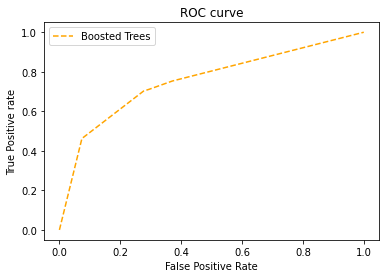

AUC Score: 0.755


In [14]:
predictions = model_grid.predict(test_features)
    
print("Confusion Matrix:")
print(confusion_matrix(test_targets, predictions))

print("Classification Report")
print(classification_report(test_targets, predictions))
    
#Beginning the plotting of ROC-curve
pred_prob = model_grid.predict_proba(test_features)
fpr, tpr, thresh = roc_curve(test_targets, pred_prob[:,1], pos_label=1)
    
#Plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Boosted Trees')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
    
#AUC Score
auc_score = roc_auc_score(test_targets, pred_prob[:,1])
print("AUC Score: " + str(np.round(auc_score , 3)))

In [15]:
#Now we set our n_estimator and learning_rate to the optimal value found in the last grid search
learningRate = 0.001
nEstimator = 1000
maximumDepth = 1

Learning rate: 0.100000, train: 0.599, test: 0.590
Learning rate: 0.010000, train: 0.592, test: 0.584
Learning rate: 0.001000, train: 0.500, test: 0.500
Learning rate: 0.000100, train: 0.500, test: 0.500
Learning rate: 0.000010, train: 0.500, test: 0.500
Learning rate: 0.000001, train: 0.500, test: 0.500


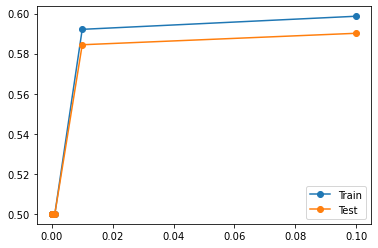

In [16]:
#Check for overfitting with learning_rate

# define lists to collect scores
train_scores, test_scores = list(), list()

# define the learning rate to evaluate
values = [0.1, 0.01, pow(10,-3), pow(10,-4), pow(10,-5), pow(10,-6)]
# evaluate a decision tree for learning rate
for i in values:
    # configure the model
    model = GradientBoostingClassifier(max_depth=maximumDepth, learning_rate = i, n_estimators=nEstimator, random_state=23).fit(
        train_features, train_targets)
    # evaluate on the train dataset
    schatting = model.predict(train_features)
    train_acc = roc_auc_score(train_targets, schatting)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_schatting = model.predict(test_features)
    test_acc = roc_auc_score(test_targets, test_schatting)
    test_scores.append(test_acc)
    # summarize progress
    print('Learning rate: %.6f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs learning rate
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()


n_estimator: 1, train: 0.500, test: 0.500
n_estimator: 1001, train: 0.500, test: 0.500
n_estimator: 2001, train: 0.583, test: 0.578
n_estimator: 3001, train: 0.583, test: 0.578
n_estimator: 4001, train: 0.591, test: 0.584
n_estimator: 5001, train: 0.592, test: 0.585


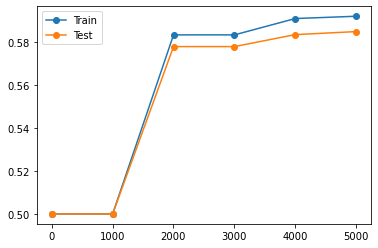

In [20]:
#Check for overfitting with n_estimators

# define lists to collect scores
train_scores, test_scores = list(), list()

# define the estimators to evaluate
values = [i for i in range(1, 6001, 1000)]
# evaluate a decision tree for estimator
for i in values:
    # configure the model
    model = GradientBoostingClassifier(max_depth=maximumDepth, learning_rate = learningRate, n_estimators=i, random_state=23).fit(
        train_features, train_targets)
    # evaluate on the train dataset
    schatting = model.predict(train_features)
    train_acc = roc_auc_score(train_targets, schatting)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_schatting = model.predict(test_features)
    test_acc = roc_auc_score(test_targets, test_schatting)
    test_scores.append(test_acc)
    # summarize progress
    print('n_estimator: %.0f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs n_estimator
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

tree depth: 1, train: 0.500, test: 0.500
tree depth: 2, train: 0.500, test: 0.500
tree depth: 3, train: 0.568, test: 0.565
tree depth: 4, train: 0.563, test: 0.561
tree depth: 5, train: 0.566, test: 0.557
tree depth: 6, train: 0.566, test: 0.558
tree depth: 7, train: 0.574, test: 0.558
tree depth: 8, train: 0.582, test: 0.565


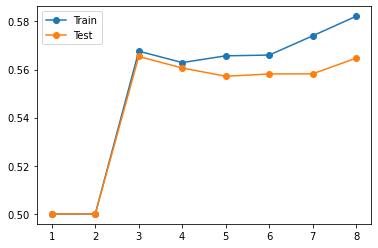

In [19]:
#Check for overfitting with n_estimators

# define lists to collect scores
train_scores, test_scores = list(), list()

# define the estimators to evaluate
values = [1,2,3,4,5,6,7,8]
# evaluate a decision tree for estimator
for i in values:
    # configure the model
    model = GradientBoostingClassifier(max_depth=i, learning_rate = learningRate, n_estimators=nEstimator, random_state=23).fit(
        train_features, train_targets)
    # evaluate on the train dataset
    schatting = model.predict(train_features)
    train_acc = roc_auc_score(train_targets, schatting)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_schatting = model.predict(test_features)
    test_acc = roc_auc_score(test_targets, test_schatting)
    test_scores.append(test_acc)
    # summarize progress
    print('tree depth: %.0f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs n_estimator
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
## OUDE CODE

In [ ]:
ensemble = GradientBoostingClassifier(max_depth=8, learning_rate = 0.001,n_estimators=4340 ,random_state=23).fit(
        train_features, train_targets)

#After the first run we make jumps of 100, 10 and lastly 1 for n_estimator

param_grid = {'learning_rate': [0.1, 0.01, pow(10,-3), pow(10,-4), pow(10,-5), pow(10,-6)], 
              'max_depth' = [1,2,3,4,5,6,7,8],
             'n_estimators' = range(1,6002, 1000)}
grid = GridSearchCV(ensemble,param_grid,refit=True, scoring='roc_auc' ,verbose =2)
grid.fit(train_features,train_targets)
print(grid.best_estimator_)
print(grid.best_params_)

grid_predictions = grid.predict(test_features)
print(confusion_matrix(test_targets,grid_predictions))
print(classification_report(test_targets,grid_predictions))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................learning_rate=0.01; total time=  54.8s
[CV] END .................................learning_rate=0.01; total time=  54.8s
[CV] END .................................learning_rate=0.01; total time= 1.1min
[CV] END .................................learning_rate=0.01; total time=  59.4s
[CV] END .................................learning_rate=0.01; total time=  56.7s
[CV] END ................................learning_rate=0.001; total time=  56.7s
[CV] END ................................learning_rate=0.001; total time=  59.8s
[CV] END ................................learning_rate=0.001; total time=  56.4s
[CV] END ................................learning_rate=0.001; total time= 1.1min
[CV] END ................................learning_rate=0.001; total time= 1.1min
[CV] END ...............................learning_rate=0.0001; total time=  42.7s
[CV] END ...............................learning_

In [ ]:
#Boosting the tree and predicting with ROC curve and classification reports

ensemble = GradientBoostingClassifier(max_depth=maximumDepth, learning_rate = learningRate,
                                          n_estimators= nEstimator ,random_state=23)
    
k = 10
kf = KFold(n_splits=k, shuffle = True)

    
dt_scores = cross_val_score(ensemble, train_features, train_targets, scoring ='roc_auc' ,cv = kf)
print("mean cross validation score: {}".format(np.round(np.mean(dt_scores),3)))

ensemble.fit(train_features, train_targets)
predictions = ensemble.predict(test_features)
    
print("Confusion Matrix:")
print(confusion_matrix(test_targets, predictions))

print("Classification Report")
print(classification_report(test_targets, predictions))
    
#Beginning the plotting of ROC-curve
pred_prob = ensemble.predict_proba(test_features)
fpr, tpr, thresh = roc_curve(test_targets, pred_prob[:,1], pos_label=1)
    
#Plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Boosted Trees')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
    
#AUC Score
auc_score = roc_auc_score(test_targets, pred_prob[:,1])
print("AUC Score: " + str(np.round(auc_score , 3)))

KeyboardInterrupt: 